In [ ]:
%conda install numpy
%conda install mlxtend

In [24]:
from mlxtend.preprocessing import one_hot
import nn.nn as nn
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

I decided to run for 200 epoches because the error stabilized by this point.
BCE error was used due to the categorical nature of the digits
The learning rate should be sufficiently small to not overshoot the gradient minimum but large enough that a reasonable minimum can be found in a reasonable number of iterations. I decreased the learning rate but still obtained the same final accuracy, so I stopped further decreasing the learning rate.

average reconstruction error over the validation set: 4.104060123070155


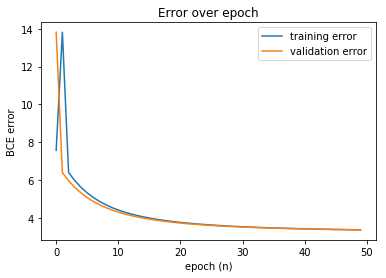

In [43]:
digits_data = load_digits()
x_train, x_test, y_train, y_test = train_test_split(digits_data["data"], digits_data["target"])
hidden_layer_dims = [64, 16, 64]
error_name = "BCE" #BCE or MSE

layers = [{'input_dim': 64, 'output_dim': hidden_layer_dims[0], 'activation': 'relu'},
          {'input_dim': hidden_layer_dims[0], 'output_dim': hidden_layer_dims[1], 'activation': 'relu'},
          {'input_dim': hidden_layer_dims[1], 'output_dim': hidden_layer_dims[2], 'activation': 'relu'},
          {'input_dim': hidden_layer_dims[2], 'output_dim': 10, 'activation': 'sigmoid'}]

n = nn.NeuralNetwork(layers, 0.0001, 4, 5, 200, error_name)

y_train_one_hot = one_hot(y_train)
y_test_one_hot = one_hot(y_test)
error_train, error_test = n.fit(x_train, y_train_one_hot, x_test, y_test_one_hot)


plt.plot(error_train, label="training error")
plt.plot(error_test, label="validation error")
plt.title("Error over epoch")
plt.xlabel("epoch (n)")
plt.ylabel(f"{error_name} error")
plt.legend()

print(f"average reconstruction error over the validation set: {sum(error_test)/len(error_test)}")
